In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.offline as py

In [5]:
# abrindo o arquivo de dados
dados_headbrain = dados_headbrain.csv = pd.read_csv('dados_headbrain.csv', sep = ';')

<ipython-input-5-e1094c4d6933>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [6]:
dados_headbrain.head()

,cod_paciente,genero,Head Size(cm^3),Brain Weight(grams)
0,1,Masculino,4512,1530
1,2,Masculino,3738,1297
2,3,Masculino,4261,1335
3,4,Masculino,3777,1282
4,5,Masculino,4177,1590


In [7]:
dados_headbrain.shape

(319, 4)

In [8]:
#Verificação de duplicatas
duplicadas = dados_headbrain.duplicated()
print("Linhas duplicadas")
print(dados_headbrain[duplicadas])

Linhas duplicadas
     cod_paciente     genero  Head Size(cm^3)  Brain Weight(grams)
237            71  Masculino             4008                 1468
238            72  Masculino             3858                 1390
239            73  Masculino             4121                 1380
240            74  Masculino             4057                 1432
241            75  Masculino             3824                 1240
..            ...        ...              ...                  ...
314           231   Feminino             3685                 1350
315           232   Feminino             3704                 1220
316           233   Feminino             3214                 1110
317           234   Feminino             3394                 1215
318           235   Feminino             3233                 1104

[82 rows x 4 columns]


In [9]:
# removendo duplicadas
dados_headbrain = dados_headbrain.drop_duplicates(subset=['cod_paciente','genero','Head Size(cm^3)','Brain Weight(grams)'])
dados_headbrain.describe()

,cod_paciente,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000
mean,119.000000,3633.991561,1282.873418
std,68.560193,365.261422,120.340446
min,1.000000,2720.000000,955.000000
25%,60.000000,3389.000000,1207.000000
50%,119.000000,3614.000000,1280.000000
75%,178.000000,3876.000000,1350.000000
max,237.000000,4747.000000,1635.000000


In [10]:
# verificando dados nulos
nulos = dados_headbrain.isnull()
cont_nulos=nulos.sum().sum()
print("Número total de dados nulos: ",cont_nulos)

Número total de dados nulos:  0


In [11]:
# Criando as variáveis

y_head = dados_headbrain.iloc[:,2].values # buscamos todos os registros da primeira coluna e convertemos no formato array.
# O comando iloc permite selecionar um conjunto de registros, o dois pontos significa selecionar os registros 0 (primeira coluna)
y_head

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [12]:
x_brain = dados_headbrain.iloc[:,3].values
x_brain

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [13]:
# Identificando a correlacao
import numpy as np
np.corrcoef(x_brain, y_head)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

In [14]:
# abrindo outro arquivo de dados
dados_pacientes = dados_pacientes.csv = pd.read_csv('/content/dados_pacientes.csv', sep = ';')

<ipython-input-14-1a199cff9286>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [15]:
dados_pacientes

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430
...,...,...,...,...,...,...,...,...,...
7994,7995,23,Funcionário Setor Privado,Ensino Médio Completo,7,Casado,Negro,3.0,2856
7995,7996,19,Funcionário Setor Privado,Ensino Médio Incompleto,5,Solteiro,Branco,1.0,1100
7996,7997,44,NaN,Ensino Médio Completo,23,Casado,Branco,0.0,3729
7997,7998,20,Funcionário Setor Privado,Ensino Médio Incompleto,8,Solteiro,Negro,0.0,1100


In [16]:
dados_pacientes.shape

(7999, 9)

In [17]:
# Verificação de duplicatas
duplicadas = dados_pacientes.duplicated()

In [18]:
# removendo duplicadas
dados_pacientes = dados_pacientes.drop_duplicates(subset=['id_cliente','idade','escolaridade','id_estado','estado_civil','raca','qtde_filhos','salario'])
dados_pacientes.describe()

,id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [19]:
dados_pacientes.shape

(7999, 9)

In [20]:
# verificando dados nulos
nulos = dados_pacientes.isnull()
cont_nulos=nulos.sum().sum()
print("Número total de dados nulos: ",cont_nulos)

Número total de dados nulos:  397


In [21]:
dados_pacientes.isnull()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
7994,False,False,False,False,False,False,False,False,False
7995,False,False,False,False,False,False,False,False,False
7996,False,False,True,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False


In [22]:
dados_pacientes.isnull().sum()

id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64

In [23]:
dados_pacientes.isna().sum()

id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64

In [24]:
dados_pacientes.describe()

,id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [25]:
dados_pacientes.loc[pd.isnull(dados_pacientes['classe_trabalho'])]

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
61,62,32,NaN,Ensino Fundamental Incompleto,12,União Estável,Branco,4.0,1100
69,70,25,NaN,Ensino Médio Completo,1,Solteiro,Branco,3.0,3450
127,128,35,NaN,Ensino Médio Incompleto,1,Casado,Amarelo,4.0,1100
148,149,43,NaN,Ensino Médio Completo,21,Divorciado,Branco,0.0,2490
153,154,52,NaN,Ensino Médio Incompleto,18,Divorciado,Branco,1.0,1100
...,...,...,...,...,...,...,...,...,...
7931,7932,51,NaN,Ensino Médio Completo,4,Divorciado,Branco,2.0,2660
7952,7953,19,NaN,Ensino Médio Completo,1,Solteiro,Branco,0.0,2581
7960,7961,30,NaN,Ensino Fundamental Completo,10,Solteiro,Branco,4.0,1100
7988,7989,20,NaN,Ensino Médio Completo,1,Solteiro,Branco,2.0,3610


In [26]:
# fazendo a mediana da variavel "qtde_filhos"
mediana = dados_pacientes.qtde_filhos.median()
print(mediana)

2.0


In [27]:
# Imput missing "quantidade de filhos" with MEDIANA (numerical variables)
dados_pacientes['qtde_filhos'].fillna(dados_pacientes['qtde_filhos'].median(), inplace=True)

In [28]:
dados_pacientes.qtde_filhos.fillna((mediana), inplace=True)

In [29]:
dados_pacientes.loc[dados_pacientes['qtde_filhos'].median()]

id_cliente                                 3
idade                                     38
classe_trabalho    Funcionário Setor Privado
escolaridade         Ensino Médio Incompleto
id_estado                                  4
estado_civil                      Divorciado
raca                                  Branco
qtde_filhos                              0.0
salario                                 1100
Name: 2, dtype: object

In [30]:
dados_pacientes.count()

id_cliente         7999
idade              7999
classe_trabalho    7612
escolaridade       7999
id_estado          7999
estado_civil       7999
raca               7999
qtde_filhos        7999
salario            7999
dtype: int64

In [31]:
print(dados_pacientes.classe_trabalho.value_counts())

classe_trabalho
Funcionário Setor Privado    5382
Autônomo                      588
Empresário                    496
Servidor Público              299
MEI                           275
Aposentado                    267
Funcionário Público           216
Menor Aprendiz                 85
Desempregado                    3
Estagiário                      1
Name: count, dtype: int64


In [32]:
dados_pacientes.classe_trabalho.fillna('Funcionario Setor Privado', inplace=True)

In [33]:
# Imput "classe de trabalho"  with MODO (Categorical Variable)
dados_pacientes['classe_trabalho'].fillna(dados_pacientes['classe_trabalho'].mode()[0], inplace=True)

In [34]:
dados_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       7999 non-null   int64  
 1   idade            7999 non-null   int64  
 2   classe_trabalho  7999 non-null   object 
 3   escolaridade     7999 non-null   object 
 4   id_estado        7999 non-null   int64  
 5   estado_civil     7999 non-null   object 
 6   raca             7999 non-null   object 
 7   qtde_filhos      7999 non-null   float64
 8   salario          7999 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 562.6+ KB


In [35]:
dados_pacientes.isnull().sum()

id_cliente         0
idade              0
classe_trabalho    0
escolaridade       0
id_estado          0
estado_civil       0
raca               0
qtde_filhos        0
salario            0
dtype: int64

In [36]:
import matplotlib.pyplot as plt


In [37]:
dados_headbrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cod_paciente         237 non-null    int64 
 1   genero               237 non-null    object
 2   Head Size(cm^3)      237 non-null    int64 
 3   Brain Weight(grams)  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ KB


In [38]:
dados_pacientes

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430
...,...,...,...,...,...,...,...,...,...
7994,7995,23,Funcionário Setor Privado,Ensino Médio Completo,7,Casado,Negro,3.0,2856
7995,7996,19,Funcionário Setor Privado,Ensino Médio Incompleto,5,Solteiro,Branco,1.0,1100
7996,7997,44,Funcionario Setor Privado,Ensino Médio Completo,23,Casado,Branco,0.0,3729
7997,7998,20,Funcionário Setor Privado,Ensino Médio Incompleto,8,Solteiro,Negro,0.0,1100


In [39]:
#Alterando nome da coluna para mergir
dados_pacientes.rename(columns={'id_cliente': 'cod_paciente'}, inplace = True)
dados_pacientes[:5]

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430


In [40]:
dados_pacientes.isnull().sum()

cod_paciente       0
idade              0
classe_trabalho    0
escolaridade       0
id_estado          0
estado_civil       0
raca               0
qtde_filhos        0
salario            0
dtype: int64

In [41]:
dados_headbrain[:5]

,cod_paciente,genero,Head Size(cm^3),Brain Weight(grams)
0,1,Masculino,4512,1530
1,2,Masculino,3738,1297
2,3,Masculino,4261,1335
3,4,Masculino,3777,1282
4,5,Masculino,4177,1590


In [42]:
dados_headbrain.isnull().sum()

cod_paciente           0
genero                 0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [43]:
base_completa = pd.merge(dados_pacientes, dados_headbrain, on='cod_paciente')
base_completa.sort_values('cod_paciente')

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero,Head Size(cm^3),Brain Weight(grams)
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,Masculino,4512,1530
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,Masculino,3738,1297
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,Masculino,4261,1335
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,Masculino,3777,1282
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,Masculino,4177,1590
...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,33,Funcionário Setor Privado,Ensino Médio Completo,16,Divorciado,Amarelo,0.0,3565,Feminino,3214,1110
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.0,10671,Feminino,3394,1215
234,235,59,Servidor Público,Ensino Médio Incompleto,26,Casado,Branco,1.0,1964,Feminino,3233,1104
235,236,40,Servidor Público,Ensino Médio Completo,7,Solteiro,Branco,1.0,3951,Feminino,3352,1170


In [44]:
base_completa.reset_index(drop=True)

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero,Head Size(cm^3),Brain Weight(grams)
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,Masculino,4512,1530
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,Masculino,3738,1297
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,Masculino,4261,1335
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,Masculino,3777,1282
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,Masculino,4177,1590
...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,33,Funcionário Setor Privado,Ensino Médio Completo,16,Divorciado,Amarelo,0.0,3565,Feminino,3214,1110
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.0,10671,Feminino,3394,1215
234,235,59,Servidor Público,Ensino Médio Incompleto,26,Casado,Branco,1.0,1964,Feminino,3233,1104
235,236,40,Servidor Público,Ensino Médio Completo,7,Solteiro,Branco,1.0,3951,Feminino,3352,1170


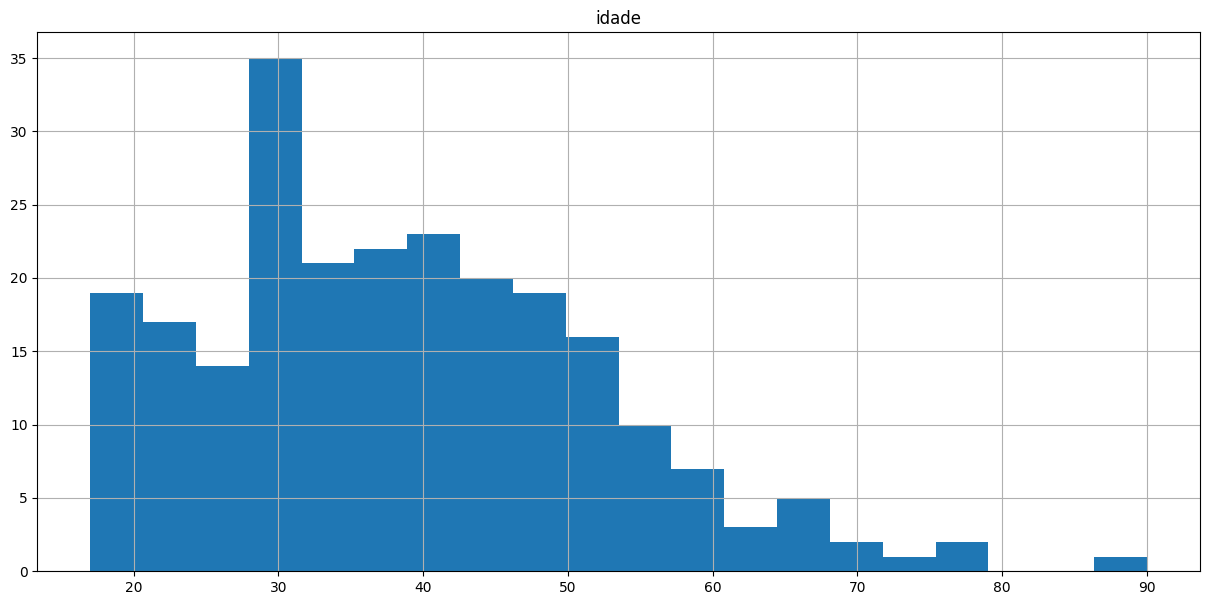

In [45]:
base_completa.hist(column='idade', figsize=(15,7), bins=20)
plt.show()

In [46]:
def calcular_wcss(cabecran):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters= k)
        kmeans.fit(X=cabecran)
        wcss.append(kmeans.inertia_)
    return wcss

In [47]:
cabecran = base_completa[['Head Size(cm^3)', 'Brain Weight(grams)']]
cabecran.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [ ]:
wcss_cabecran = calcular_wcss(cabecran)

In [49]:
type(wcss_cabecran)

list

In [50]:
# Visualiyando dados obtidos wcss
for i in range(len(wcss_cabecran)):
  print(f'o cluster {i} possui valor de wcss de: {wcss_cabecran[i]}')

o cluster 0 possui valor de wcss de: 34903864.185654
o cluster 1 possui valor de wcss de: 12994263.409477172
o cluster 2 possui valor de wcss de: 7402867.843870258
o cluster 3 possui valor de wcss de: 4948479.069395586
o cluster 4 possui valor de wcss de: 3591427.805072651
o cluster 5 possui valor de wcss de: 2944381.792482854
o cluster 6 possui valor de wcss de: 2427060.557155791
o cluster 7 possui valor de wcss de: 2093775.4456179684
o cluster 8 possui valor de wcss de: 1873057.381399473
o cluster 9 possui valor de wcss de: 1687542.5421010335


In [51]:
grafico_wcss = px.line( x=range(1,11),
                        y=wcss_cabecran
                        )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='calculando o wcss',
                  xaxis_title = 'número de clusters',
                  yaxis_title = 'valor do wcss',
                  template = 'plotly_white'
                  )

fig.show()

In [ ]:
kmeans_cabecran = KMeans(n_clusters=3, random_state=42)
base_completa['cluster'] = kmeans_cabecran.fit_predict(cabecran)

In [53]:
base_completa

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero,Head Size(cm^3),Brain Weight(grams),cluster
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,Masculino,4512,1530,2
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,Masculino,3738,1297,1
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,Masculino,4261,1335,2
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,Masculino,3777,1282,1
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,Masculino,4177,1590,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,33,Funcionário Setor Privado,Ensino Médio Completo,16,Divorciado,Amarelo,0.0,3565,Feminino,3214,1110,0
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.0,10671,Feminino,3394,1215,0
234,235,59,Servidor Público,Ensino Médio Incompleto,26,Casado,Branco,1.0,1964,Feminino,3233,1104,0
235,236,40,Servidor Público,Ensino Médio Completo,7,Solteiro,Branco,1.0,3951,Feminino,3352,1170,0


In [54]:
# Calcular os centroides de cada cluster
centroides_clusters = kmeans_cabecran.cluster_centers_
centroides_clusters

array([[3248.15      , 1170.075     ],
       [3680.40186916, 1305.43925234],
       [4152.02      , 1415.06      ]])

In [55]:
grafico = px.scatter(x = base_completa['Head Size(cm^3)'],
                        y = base_completa['Brain Weight(grams)'],
                        color = base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
grafico_cabecran_final = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_cabecran_final.show()

In [56]:
def  plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color= base_completa['cluster'])

  fig = go.Figure(grafico)

  fig.update_layout(title= 'Analise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,
                    )

  fig.show()

In [57]:
plotar_grafico(base_completa['Head Size(cm^3)'], base_completa['Brain Weight(grams)'], 'Head Size(cm^3)', 'Brain Weight(grams)')

In [58]:
# Segmentando os pacientes baseado na analise dos clusters
# Vamos agrupar em 3 tipos: Tamanho Pequeno, Tamanho Medio, Tamanho Grande
x = 'Head Size(cm^3)'
y = 'Brain Weight(grams)'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [59]:
cluster_pacientes = base_completa

In [60]:
# Segmentando os pacientes
cluster_pacientes.loc[cluster_pacientes['cluster']==0,'nome_cluster'] = 'Tamanho Pequeno'
cluster_pacientes.loc[cluster_pacientes['cluster']==1,'nome_cluster'] = 'Tamanho Medio'
cluster_pacientes.loc[cluster_pacientes['cluster']==2,'nome_cluster'] = 'Tamanho Grande'

In [61]:
cluster_pacientes

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero,Head Size(cm^3),Brain Weight(grams),cluster,nome_cluster
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,Masculino,4512,1530,2,Tamanho Grande
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,Masculino,3738,1297,1,Tamanho Medio
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,Masculino,4261,1335,2,Tamanho Grande
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,Masculino,3777,1282,1,Tamanho Medio
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,Masculino,4177,1590,2,Tamanho Grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,33,Funcionário Setor Privado,Ensino Médio Completo,16,Divorciado,Amarelo,0.0,3565,Feminino,3214,1110,0,Tamanho Pequeno
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.0,10671,Feminino,3394,1215,0,Tamanho Pequeno
234,235,59,Servidor Público,Ensino Médio Incompleto,26,Casado,Branco,1.0,1964,Feminino,3233,1104,0,Tamanho Pequeno
235,236,40,Servidor Público,Ensino Médio Completo,7,Solteiro,Branco,1.0,3951,Feminino,3352,1170,0,Tamanho Pequeno


In [62]:
# Analise dos clusters criados
# Verificar valores de 'head size' por cluster
cluster_pacientes.groupby('nome_cluster')['Head Size(cm^3)'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Tamanho Grande,50.0,4152.020000,189.529115,3876.0,4009.0,4108.5,4259.0,4747.0
Tamanho Medio,107.0,3680.401869,134.637519,3443.0,3571.0,3669.0,3794.5,3930.0
Tamanho Pequeno,80.0,3248.150000,168.631206,2720.0,3157.5,3281.5,3389.5,3490.0


In [63]:
cluster_pacientes.groupby('nome_cluster')['genero'].describe()

,count,unique,top,freq
nome_cluster,,,,
Tamanho Grande,50,2,Masculino,45
Tamanho Medio,107,2,Masculino,69
Tamanho Pequeno,80,2,Feminino,60


In [64]:
cluster_pacientes.query('nome_cluster =="Tamanho Pequeno" & genero == "Feminino"')

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero,Head Size(cm^3),Brain Weight(grams),cluster,nome_cluster
134,135,38,Funcionário Público,Mestrado,17,Casado,Branco,5.0,9952,Feminino,2857,1027,0,Tamanho Pequeno
135,136,43,Autônomo,Ensino Médio Incompleto,27,Casado,Branco,2.0,1100,Feminino,3436,1235,0,Tamanho Pequeno
137,138,20,Funcionário Setor Privado,Ensino Médio Completo,7,Solteiro,Branco,0.0,3892,Feminino,3302,1165,0,Tamanho Pequeno
138,139,49,Funcionário Setor Privado,Ensino Médio Completo,8,Casado,Pardo,1.0,2835,Feminino,3104,1080,0,Tamanho Pequeno
139,140,61,MEI,Ensino Médio Incompleto,4,Casado,Branco,1.0,4285,Feminino,3171,1127,0,Tamanho Pequeno
142,143,45,Funcionário Setor Privado,Ensino Médio Completo,22,Solteiro,Branco,1.0,3256,Feminino,3175,1200,0,Tamanho Pequeno
143,144,70,Aposentado,Ensino Médio Completo,2,Solteiro,Branco,4.0,2616,Feminino,3438,1290,0,Tamanho Pequeno
146,147,36,Funcionário Setor Privado,Ensino Médio Incompleto,5,Viúvo,Branco,5.0,1100,Feminino,3401,1140,0,Tamanho Pequeno
147,148,64,Funcionário Setor Privado,Ensino Médio Incompleto,26,Casado,Branco,4.0,1100,Feminino,3267,1243,0,Tamanho Pequeno
149,150,47,Empresário,Ensino Médio Completo,8,Divorciado,Branco,2.0,10360,Feminino,3090,1168,0,Tamanho Pequeno


In [65]:
cluster_pacientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Tamanho Grande,50.0,39.080000,13.013086,19.0,29.25,39.0,48.75,75.0
Tamanho Medio,107.0,36.794393,12.914624,17.0,27.00,36.0,45.00,79.0
Tamanho Pequeno,80.0,40.962500,14.537114,17.0,31.00,38.0,49.25,90.0


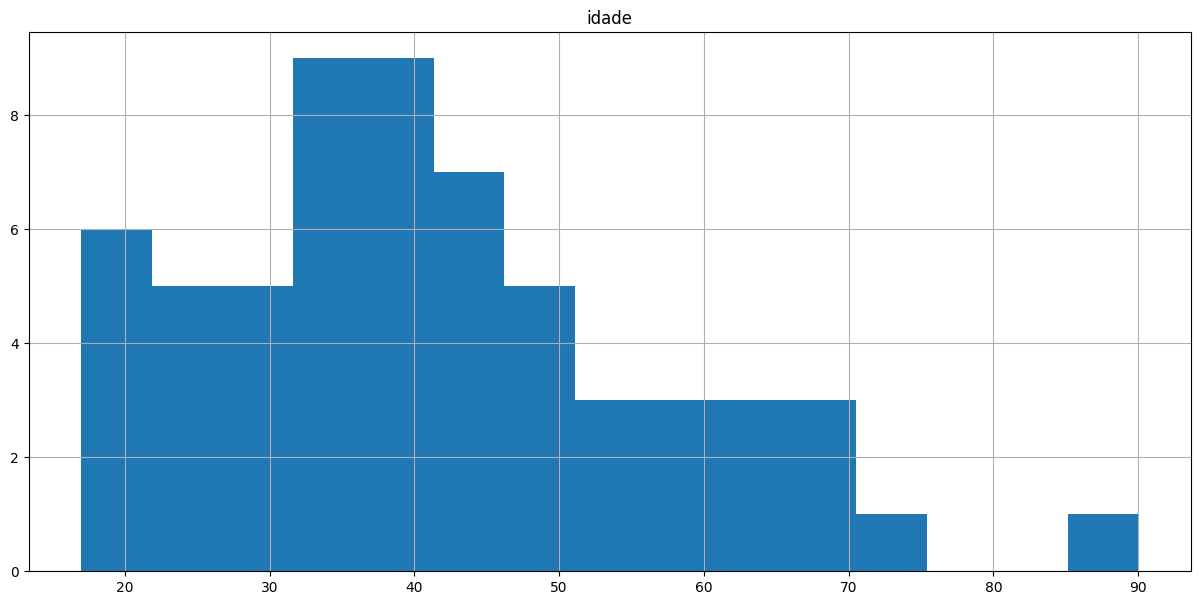

In [66]:
cluster_pacientes.query('nome_cluster =="Tamanho Pequeno" & genero == "Feminino"').hist(column='idade', figsize=(15,7), bins=15)
plt.show()